### Imports

In [7]:
# Tools
import pandas as pd
import numpy as np
# from functions import TradeChat Class
from functions import TradeChat

# Visual
import seaborn as sns
import matplotlib.pyplot as plt


# NLP Preprocessing
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Models
from gsdmm import MovieGroupProcess
import gensim

In [8]:
# Loading up the data into a dataframe
%store -r tm_df_token
df = tm_df_token

In [9]:
df

,date,time,text,sentiment,target,text_tokenized,joined_tokens
3,2/22/2022,8:14:42 AM,8 hours?,Negative,Game,[hours],hours
5,2/22/2022,8:14:50 AM,prolly honestly 12 hours,Negative,Game,"[prolly, honestly, hours]",prolly honestly hours
7,2/22/2022,8:14:50 AM,probaly thw whole day,Negative,Game,"[probaly, thw, whole, day]",probaly thw whole day
8,2/22/2022,8:15:23 AM,i was working all week then on call and had t...,Negative,Game,"[working, week, call, work, days, finally, tod...",working week call work days finally today fuck...
10,2/22/2022,8:15:44 AM,i am nerd raging hard. i am untethered and my...,Negative,Game,"[nerd, raging, hard, untethered, rage, knows, ...",nerd raging hard untethered rage knows bounds
...,...,...,...,...,...,...,...
2228,2/23/2022,9:36:30 PM,my sub expires tomorrow and i dont plan on re...,Negative,Game,"[sub, expires, tomorrow, plan, reupping, til, ...",sub expires tomorrow plan reupping til next xp...
2237,2/23/2022,9:37:40 PM,nah idc about raids,Negative,Game,"[nah, idc, raids]",nah idc raids
2282,2/23/2022,9:43:49 PM,its also trumps fault that the blizz devs did...,Negative,Game,"[also, trumps, fault, blizz, devs, didnt, star...",also trumps fault blizz devs didnt start fixin...
2303,2/23/2022,9:45:42 PM,how do i get back to new zone???,Negative,Game,"[get, back, new, zone]",get back new zone


In [10]:
docs = df.text_tokenized

In [11]:
dictionary = gensim.corpora.Dictionary(docs)
print(dictionary.num_nnz)

1790


In [12]:
vocab_length = len(dictionary)
vocab_length

881

In [13]:
bow_corpus = [dictionary.doc2bow(doc) for doc in docs]

In [98]:
gsdmm = MovieGroupProcess(K=50, alpha=0.1, beta=0.1, n_iters=30)
y = gsdmm.fit(docs, vocab_length)

In stage 0: transferred 393 clusters with 47 clusters populated
In stage 1: transferred 299 clusters with 41 clusters populated
In stage 2: transferred 247 clusters with 38 clusters populated
In stage 3: transferred 260 clusters with 39 clusters populated
In stage 4: transferred 234 clusters with 36 clusters populated
In stage 5: transferred 249 clusters with 36 clusters populated
In stage 6: transferred 245 clusters with 37 clusters populated
In stage 7: transferred 244 clusters with 40 clusters populated
In stage 8: transferred 236 clusters with 32 clusters populated
In stage 9: transferred 226 clusters with 35 clusters populated
In stage 10: transferred 224 clusters with 33 clusters populated
In stage 11: transferred 225 clusters with 32 clusters populated
In stage 12: transferred 220 clusters with 34 clusters populated
In stage 13: transferred 221 clusters with 34 clusters populated
In stage 14: transferred 221 clusters with 33 clusters populated
In stage 15: transferred 227 cluste

In [99]:
doc_count = np.array(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

Number of documents per topic : [15  2  0 18 19  2  1  5  6  0  1  2 51 24 48  0  6  6  0  0 23 15  0 10
  0  0  1  0  2  0 24 16 27  3  0  0 15  0  8  3  0 16  0 22  4  2  0  0
  0 20]


In [100]:
# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Most important clusters (by number of docs inside): [12 14 32 13 30 20 43 49  4  3 41 31 21  0 36]


In [101]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

In [102]:
len(gsdmm.cluster_word_distribution)

50

In [103]:
top_words(gsdmm.cluster_word_distribution, top_index, 15)


Cluster 12 : [('patch', 14), ('lol', 13), ('new', 10), ('game', 9), ('day', 7), ('dead', 6), ('zone', 5), ('never', 4), ('like', 4), ('gonna', 4), ('imagine', 3), ('released', 3), ('gear', 3), ('gotta', 2), ('take', 2)]

Cluster 14 : [('oribos', 13), ('org', 13), ('broken', 9), ('think', 6), ('game', 5), ('broke', 5), ('get', 4), ('would', 4), ('port', 3), ('portals', 3), ('bugged', 3), ('dc', 3), ('rn', 3), ('fuck', 3), ('lag', 3)]

Cluster 32 : [('new', 7), ('week', 4), ('getting', 4), ('gear', 3), ('area', 3), ('negative', 3), ('mage', 2), ('scammer', 2), ('k', 2), ('blizz', 2), ('lmao', 1), ('alts', 1), ('cant', 1), ('prolly', 1), ('honestly', 1)]

Cluster 13 : [('play', 6), ('nothing', 5), ('patch', 3), ('day', 3), ('working', 3), ('blizzard', 3), ('wouldnt', 2), ('without', 2), ('want', 2), ('relog', 2), ('weeks', 2), ('broken', 2), ('server', 2), ('anyone', 2), ('gonna', 1)]

Cluster 30 : [('trash', 8), ('gear', 5), ('korthia', 4), ('people', 4), ('pay', 4), ('pvp', 4), ('time'

In [104]:
# Import wordcloud library
from wordcloud import WordCloud

In [105]:
# Get topic word distributions from gsdmm model
cluster_word_distribution = gsdmm.cluster_word_distribution

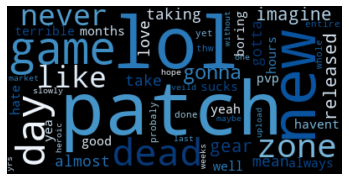

In [131]:
# Generate a word cloud image
wordcloud = WordCloud(max_words=50, colormap='Blues').generate_from_frequencies(cluster_word_distribution[12])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("images\patch.png")

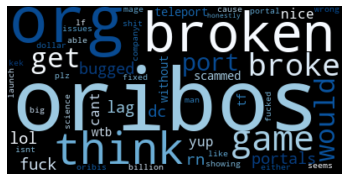

In [132]:
# Generate a word cloud image
wordcloud = WordCloud(max_words=50, colormap='Blues').generate_from_frequencies(cluster_word_distribution[14])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("images\server_one.png")

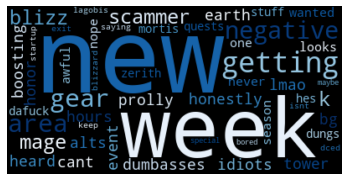

In [147]:
wordcloud = WordCloud(max_words=50, colormap='Blues').generate_from_frequencies(cluster_word_distribution[32])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("images\\unknown.png")

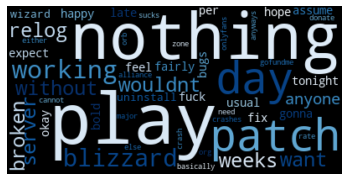

In [134]:
wordcloud = WordCloud(max_words=50, colormap='Blues').generate_from_frequencies(cluster_word_distribution[13])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("images\server_two.png")

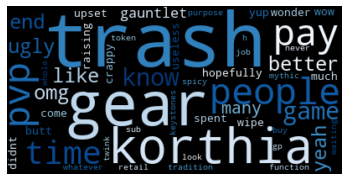

In [135]:
wordcloud = WordCloud(max_words=50, colormap='Blues').generate_from_frequencies(cluster_word_distribution[30])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("images\set_one.png")

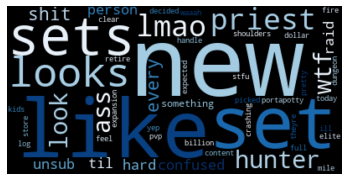

In [136]:
wordcloud = WordCloud(max_words=50, colormap='Blues').generate_from_frequencies(cluster_word_distribution[20])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("images\set_two.png")

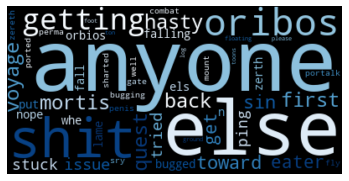

In [144]:
wordcloud = WordCloud(max_words=50, colormap='Blues').generate_from_frequencies(cluster_word_distribution[43])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("images\quest.png")

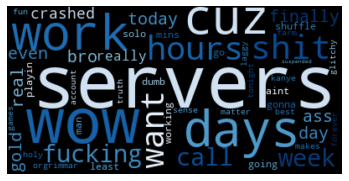

In [150]:
wordcloud = WordCloud(max_words=50, colormap='Blues').generate_from_frequencies(cluster_word_distribution[49])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

wordcloud.to_file("images\server_three.png")